<a href="https://colab.research.google.com/github/KanoonGammy/Applied_ML_HW/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Load libraries

In [171]:
# Summary libs
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing # Preparing Data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# Visualizing Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [172]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [173]:
df=pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv")
df

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Data Analysis

In [174]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 6)

# Preparing the Data (Data Slicing)

In [175]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data

df=df.apply(string_to_int.fit_transform) #fit and transform it
df.drop("Day", axis=1, inplace=True)
df

,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [271]:
#To divide our data into attribute set and Label:
feature_cols = df.columns
X = df.loc[:, df.columns != 'Play_Tennis']  #contains the attribute
y = df.Play_Tennis                                  #contains the label

In [272]:
df.iloc[:,-1]

,Play_Tennis
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [273]:
#Experiment1
#X = X.iloc[:,0]
#X = X.to_frame()
#X.head()

In [274]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=345)

In [275]:
#if len(X_train.shape) == 1:
#  X_train = np.reshape(X_train, (-1,1))
#  X_test = np.reshape(X_test, (-1,1))

In [276]:
X_train.shape

(9, 4)

# Training and Making Predictions

In [277]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [278]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [279]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [280]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
13,0,0
9,1,1
0,0,0
12,1,1
8,1,1


# Evaluating the Algorithm

In [281]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Visualizing Decision Trees

In [282]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [283]:
X_train.head(9)
y_train.head(9)
#string_to_int.inverse_transform(X_train.iloc[:,0])

,Play_Tennis
4,1
1,0
3,1
11,1
6,1
2,1
5,0
7,0
10,1


In [285]:
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=2)

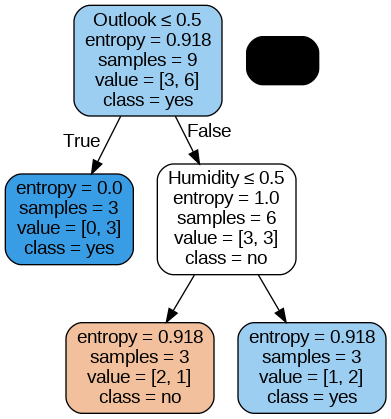

In [284]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

1. Apply random forest, xgboost, catboot algorithm to the play tennis dataset.

# Random Forest

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [230]:
# Fetch Data
data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv')
data

,Day,Outlook,Temperature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [315]:
# data preparation
# Feature Selection
# X = data.loc[:,data.columns != "Play_Tennis" ]


from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data
data=data.apply(string_to_int.fit_transform) #fit and transform it

X = data.iloc[:,1:-1 ]
y = data.iloc[:,-1:]

# display(X, y)

In [292]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [293]:
#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [294]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [290]:
y_pred = model.predict(X_test)

In [264]:
y_pred.shape

(3,)

In [267]:
data_p = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred})
data_p

,Actual,Predicted
0,1,1
1,0,0
2,1,1


In [268]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]


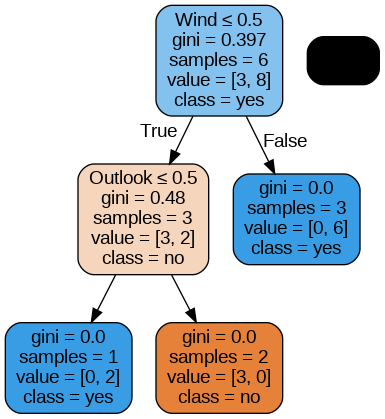

In [298]:
#!pip install pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(model.estimators_[0], out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =X.columns ,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('playtennis.png')
Image(graph.create_png())

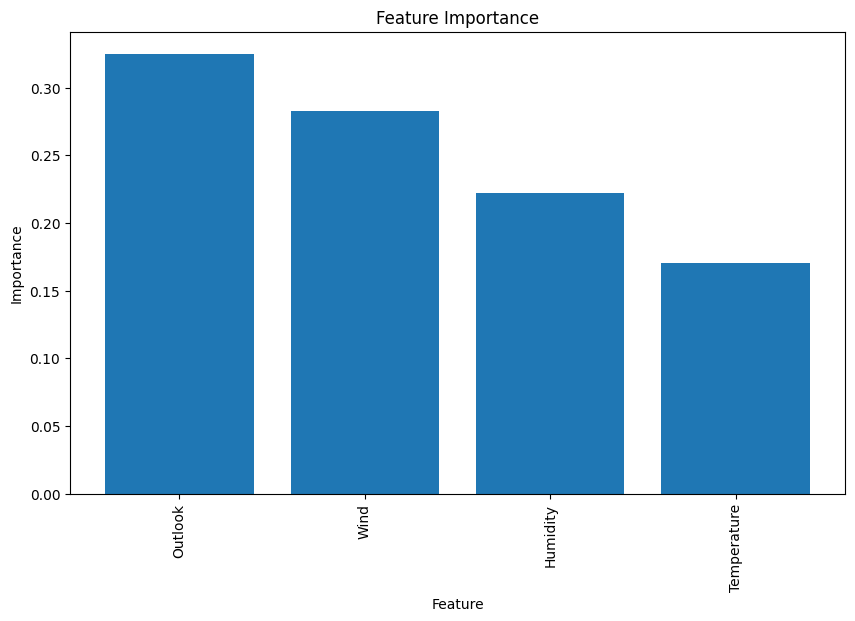

In [299]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# XGBoosts

In [199]:
pip install xgboost

In [317]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [316]:
# data preparation
# Feature Selection
# X = data.loc[:,data.columns != "Play_Tennis" ]

# Fetch Data
data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv')
data

from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder() #encode your data
data=data.apply(string_to_int.fit_transform) #fit and transform it

X = data.iloc[:,1:-1 ]
y = data.iloc[:,-1:]

# display(X, y)

In [318]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [319]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:20:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [320]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1])

In [321]:
data_p = pd.DataFrame({"Actual": y_test.values.ravel(),"Predited": y_pred})
data_p

,Actual,Predited
0,1,1
1,0,1
2,1,1


In [322]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix:
[[0 1]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


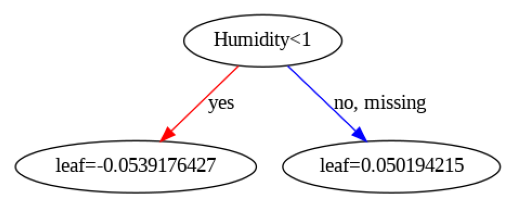

In [324]:
import xgboost as xgb
from matplotlib import pyplot as plt

# สร้าง DMatrix จากข้อมูล X และ y (ถ้ายังไม่ได้ทำ)
# dtrain = xgb.DMatrix(X, label=y)

# แสดงแผนภาพของต้นไม้การตัดสินใจต้นแรกใน XGBClassifier
xgb.plot_tree(model, num_trees=0)  # num_trees=0 หมายถึงต้นไม้ต้นแรก

# แสดงแผนภาพ
plt.show()

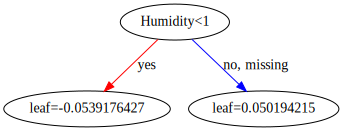

In [326]:
import xgboost as xgb

# แสดงแผนภาพของต้นไม้การตัดสินใจต้นแรกใน XGBClassifier
xgb.to_graphviz(model, num_trees=0)

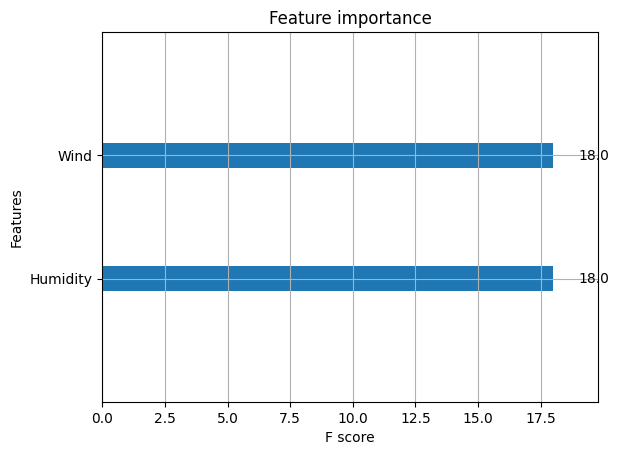

In [327]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [328]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [329]:
# Get the best parameters from grid_search
best_params = grid_search.best_params_

# Create a new model with the best parameters
best_model = XGBClassifier(**best_params,
                           use_label_encoder=False,
                           eval_metric='logloss',
                           random_state=42)

# Retrain the model with the best parameters
best_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:21:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [330]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred

array([1, 1, 1])

In [331]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy}')

# Classification Report
print('Classification Report with Best Parameters:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix with Best Parameters:')
print(confusion_matrix(y_test, y_pred))

Accuracy with Best Parameters: 0.6666666666666666
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix with Best Parameters:
[[0 1]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


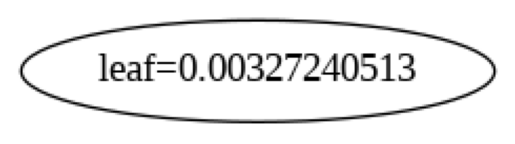

In [335]:
import xgboost as xgb
from matplotlib import pyplot as plt

# สร้าง DMatrix จากข้อมูล X และ y (ถ้ายังไม่ได้ทำ)
# dtrain = xgb.DMatrix(X, label=y)

# แสดงแผนภาพของต้นไม้การตัดสินใจต้นแรกใน XGBClassifier
xgb.plot_tree(best_model, num_trees=0)  # num_trees=0 หมายถึงต้นไม้ต้นแรก

# แสดงแผนภาพ
plt.show()

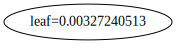

In [336]:
import xgboost as xgb

# แสดงแผนภาพของต้นไม้การตัดสินใจต้นแรกใน XGBClassifier
xgb.to_graphviz(best_model, num_trees=0)

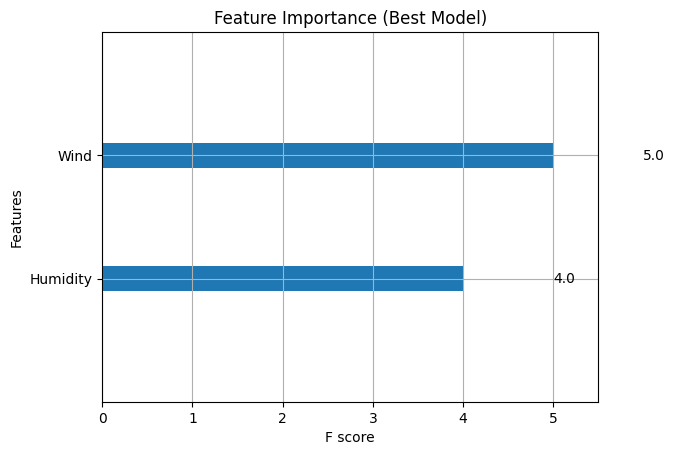

In [332]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(best_model)
plt.title('Feature Importance (Best Model)')
plt.show()

# Catboot

In [212]:
pip install catboost​

In [359]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [375]:
# data preparation
# Feature Selection
# X = data.loc[:,data.columns != "Play_Tennis" ]


from sklearn import preprocessing
# string_to_int= preprocessing.LabelEncoder() #encode your data
# data=data.apply(string_to_int.fit_transform) #fit and transform it
# Fetch Data
data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week10-desicion-tree/PlayTennis.csv')
data
X = data.iloc[:,1:-1 ]
y = data.iloc[:,-1:]

# display(X, y)

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=6,
                           random_seed=42,
                           eval_metric='Accuracy',
                           verbose=0)

# Train the model
model_cat.fit(X_train, y_train, cat_features= X.columns.tolist())

In [377]:
y_pred = model_cat.predict(X_test)
y_pred

array(['Yes', 'Yes', 'Yes'], dtype=object)

In [378]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix:
[[0 1]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


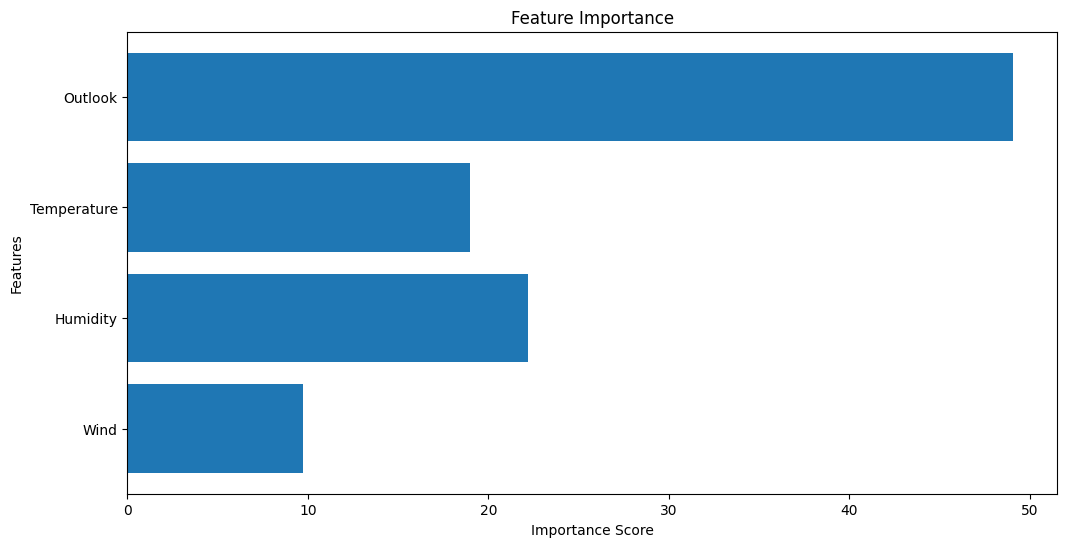

In [379]:
import matplotlib.pyplot as plt

# ดึงข้อมูลความสำคัญของฟีเจอร์
feature_importances = model_cat.get_feature_importance()
feature_names = X.columns

# สร้างแผนภาพ Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # เรียงลำดับจากฟีเจอร์ที่สำคัญที่สุด
plt.show()


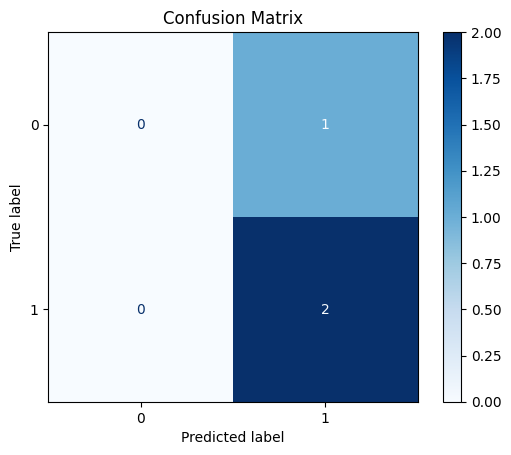

In [380]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ทำนายชุดข้อมูลทดสอบ
y_pred = model_cat.predict(X_test)

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงผล Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


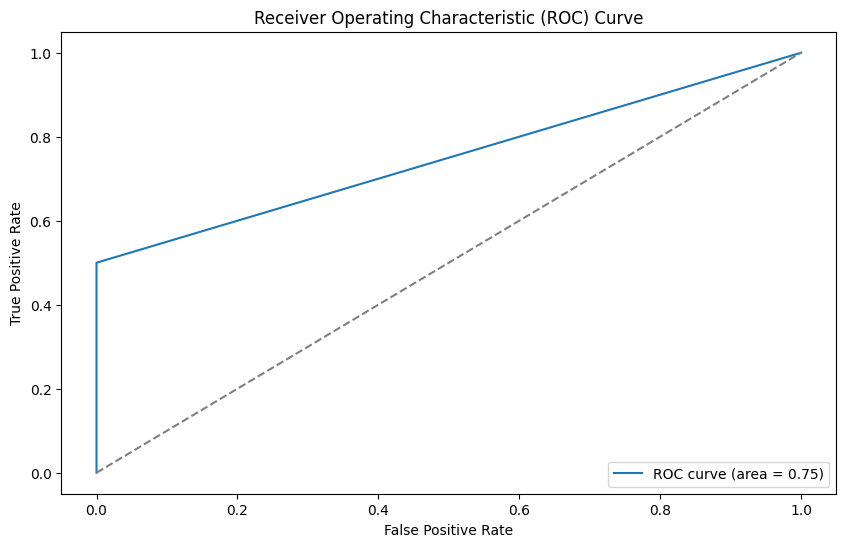

In [382]:
from sklearn.preprocessing import LabelEncoder

# สร้าง LabelEncoder
le = LabelEncoder()

# แปลง y_train และ y_test เป็นตัวเลข
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# หลังจากแปลงแล้ว, ดำเนินการคำนวณ ROC Curve ต่อได้เลย
from sklearn.metrics import roc_curve, auc

y_probs = model_cat.predict_proba(X_test)[:, 1]

# สร้าง ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [392]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=CatBoostClassifier(verbose=0, random_seed=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train, cat_features= X.columns.tolist())
print(f'Best parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.01}


In [393]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, cat_features=X.columns.tolist())

# Get the best parameters from grid_search
best_params = grid_search.best_params_

# Create a new CatBoost model with the best parameters
best_model = CatBoostClassifier(**best_params,
                                random_seed=42,
                                verbose=0)

# Retrain the model with the best parameters
best_model.fit(X_train, y_train, cat_features=X.columns.tolist())

In [396]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
data_p = pd.DataFrame({"Actual": y_test, "Predited": y_pred})
data_p

,Actual,Predited
0,1,1
1,0,1
2,1,1


In [395]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Parameters: {accuracy}')

# Classification Report
print('Classification Report with Best Parameters:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix with Best Parameters:')
print(confusion_matrix(y_test, y_pred))


Accuracy with Best Parameters: 0.6666666666666666
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix with Best Parameters:
[[0 1]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


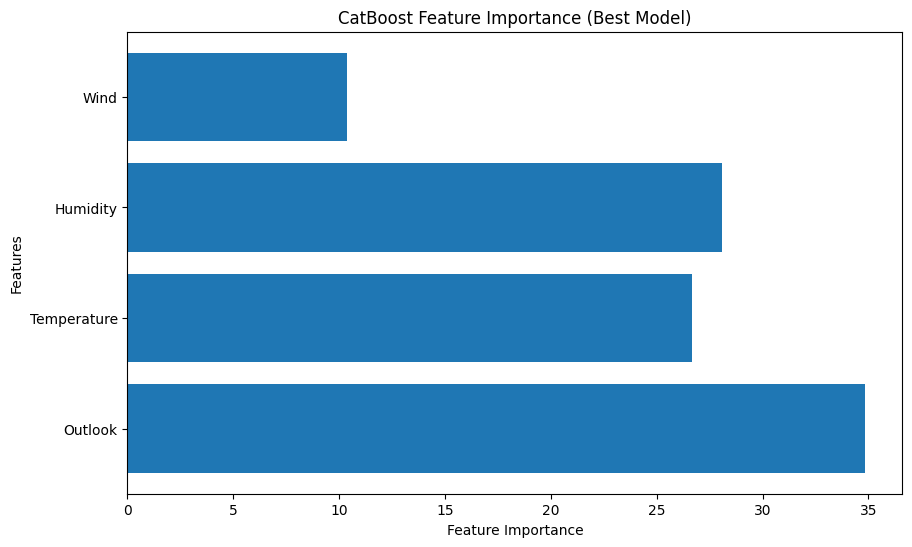

In [397]:
import matplotlib.pyplot as plt

# Get feature importance from the best model
feature_importance = best_model.get_feature_importance()
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance (Best Model)')
plt.show()